# Homework Autoencoders
This homework consists of two exercises.

1. Follow the steps from the homework for Lab 3, Exercise 3 (CNN to classify hand writing), but use an autoencoder on the scans of the hand writing. Set the autoeoncoder up as a CNN. Compare the results with and without an autoencoder.

Notes:
1. You need to change the actiavtion of the decoder to linear. 
2. Observe what changes with when you change the dimension of the latent state.
            

### Ex 1: Autoencoder on the scans

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input, UpSampling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Rehsape the data to include channel dimension
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## Basic CNN without Autoencoder

In [4]:
# We build a CNN with two convoluation layers followed by pooling and dense layers
def create_basic_cnn():
    model = Sequential([
        Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(64, kernel_size=(3,3), activation="relu"),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="softmax")
    ])

    # Model compile
    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# Create the model
basic_cnn = create_basic_cnn()

# Summary of the model
basic_cnn.summary()

# Train the basic CNN
history_basic = basic_cnn.fit(x_train, y_train_cat,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.1,
                              verbose=1)

# Evaluate on test data
test_loss_basic, test_acc_basic = basic_cnn.evaluate(x_test, y_test_cat, verbose=0)
print(f'Basic CNN Test Accuracy: {test_acc_basic:.4f}')


c:\Users\henrik.knudsen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7829 - loss: 0.6807 - val_accuracy: 0.9820 - val_loss: 0.0631
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9655 - loss: 0.1118 - val_accuracy: 0.9865 - val_loss: 0.0490
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9755 - loss: 0.0841 - val_accuracy: 0.9877 - val_loss: 0.0438
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9824 - loss: 0.0619 - val_accuracy: 0.9892 - val_loss: 0.0341
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9845 - loss: 0.0530 - val_accuracy: 0.9902 - val_loss: 0.0345
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9854 - loss: 0.0494 - val_accuracy: 0.9905 - val_loss: 0.0319
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.9908 - val_loss: 0.0316
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9887 - loss: 0.0357 - val_accu

## CNN Autoencoder

In [5]:
# Creating our own function to create our CNN Autoencoder model
def create_cnn_autoencoder(latent_dim):
    input_img = Input(shape=(28, 28, 1))

    # Encoder
    x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
    x = MaxPooling2D((2,2), padding="same")(x)
    x = Conv2D(latent_dim, (3,3), activation="relu", padding="same")(x)
    encoded = MaxPooling2D((2,2), padding="same")(x)

    # Decoder
    x = Conv2D(latent_dim, (3,3), activation="relu", padding="same")(encoded)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
    x = UpSampling2D((2,2))(x)
    decoded = Conv2D(1, (3,3), activation="linear", padding="same")(x)

    # Autoencoder model
    autoencoder = Model(input_img, decoded)

    # Compiling the model
    autoencoder.compile(optimizer="adam", loss="mean_squared_error")

    # Encoder Model
    encoder = Model(input_img, encoded)

    return autoencoder, encoder


# Create the Autoencoder
autoencoder, encoder = create_cnn_autoencoder(latent_dim=64)

# Summary of the Autoencoder
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

# Train the autoencoder
history_autoencoder = autoencoder.fit(x_train, x_train,
                                      epochs=10,
                                      batch_size=128,
                                      validation_split=0.1,
                                      callbacks=[early_stop],
                                      verbose=1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 0.0190 - val_loss: 0.0055
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - loss: 0.0023 - val_loss: 0.0022


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


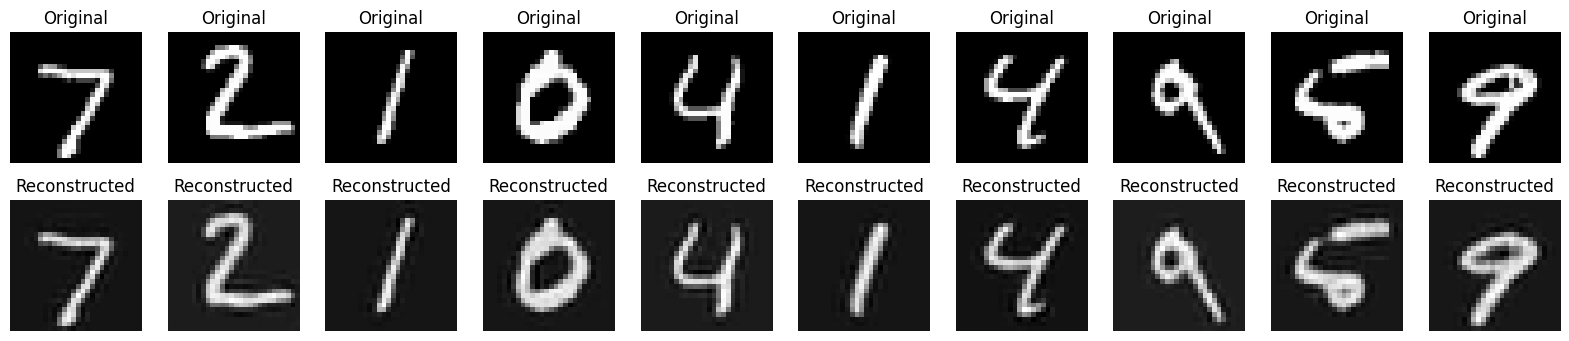

In [7]:
# Visualization
num_images = 10
test_imgs = x_test[:num_images]
reconstructed = autoencoder.predict(test_imgs)

# Plot original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(num_images):
    # Original
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(test_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Reconstructed
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


#### Experimenting with Different Latent Dimensions

In [9]:
def experiment_latent_dimensions(latent_dims, x_train, x_test, y_train_cat, y_test_cat):
    # Initialzing dictionary 
    results = {}

    for latent in latent_dims:
        print(f"\n--- Training Autoencoder with latent_dim = {latent} ---")

        ####################################################
        # 1. Creating Autoencoder and encoder
        ####################################################

        autoencoder, encoder = create_cnn_autoencoder(latent_dim=latent)

        ####################################################
        # 2. Training and Testing Autoencoder
        ####################################################
        history = autoencoder.fit(x_train, x_train, epochs=10,
                                  batch_size=128, validation_split=0.1,
                                  callbacks=[EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)],
                                  verbose=True)
        # Reconstruct test images
        reconstructed = autoencoder.predict(x_test[:10])

        # Evaluate reconstruction loss on test set
        test_recon_loss = autoencoder.evaluate(x_test, x_test, verbose=0)
        print(f"Latent_dim={latent} | Test Reconstruction Loss: {test_recon_loss:.6f}")

        ####################################################
        # 3. Training and Testing Encoder
        ####################################################
        encoded_train = encoder.predict(x_train)
        encoded_test = encoder.predict(x_test)

        # Flatten the encoded representations
        encoded_train_flat = encoded_train.reshape((encoded_train.shape[0], -1))
        encoded_test_flat = encoded_test.reshape((encoded_test.shape[0], -1))

        # Define and trains classifier
        classifier = Sequential([
            Dense(128, activation='relu', input_dim=encoded_train_flat.shape[1]),
            Dropout(0.5),
            Dense(10, activation='softmax')
        ])
        
        classifier.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        
        history_classifier = classifier.fit(encoded_train_flat, y_train_cat,
                                            epochs=10,
                                            batch_size=128,
                                            validation_split=0.1,
                                            callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)],
                                            verbose=0)
        
        # Evaluate classifier
        test_loss_encoded, test_acc_encoded = classifier.evaluate(encoded_test_flat, y_test_cat, verbose=0)
        print(f"Latent_dim={latent} | Classifier Test Accuracy: {test_acc_encoded:.4f}")


        # Store results
        results[latent] = {
            "recon_loss": test_recon_loss,
            "classifier_acc":test_acc_encoded
        }
    

    # Returning the dictionary
    return results




In [10]:
# Setting the appropiate latent dimensions
latent_dims = [32, 64, 128]

results = experiment_latent_dimensions(latent_dims, x_train, x_test, y_train_cat, y_test_cat)


--- Training Autoencoder with latent_dim = 32 ---
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0248 - val_loss: 0.0067
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0062 - val_loss: 0.0052
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.0031 - val_loss: 0.0030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
Latent_dim=32 | Test Reconstruction

c:\Users\henrik.knudsen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Latent_dim=32 | Classifier Test Accuracy: 0.9722

--- Training Autoencoder with latent_dim = 64 ---
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - loss: 0.0204 - val_loss: 0.0058
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 10/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - loss: 0.0024 - val_loss: 0.0024
1/1 ━━━━━━━━━━━━━━━

In [11]:
# Printing out the results
for latent_dim, metrics in results.items():
    print(f"Latent Dimension: {latent_dim} | Reconstruction Loss: {metrics['recon_loss']:.6f} | Classifier Test Accuracy: {metrics['classifier_acc']:.4f}")


Latent Dimension: 32 | Reconstruction Loss: 0.002961 | Classifier Test Accuracy: 0.9722
Latent Dimension: 64 | Reconstruction Loss: 0.002386 | Classifier Test Accuracy: 0.9807
Latent Dimension: 128 | Reconstruction Loss: 0.002598 | Classifier Test Accuracy: 0.9831


## CNN Classifier using Autoencoder's Encoder

In [33]:
# Get encoded representations for training and test data
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)

# Flatten the encoded representations
encoded_train_flat = encoded_train.reshape((encoded_train.shape[0], -1))
encoded_test_flat = encoded_test.reshape((encoded_test.shape[0], -1))

# Creating classifier function
def create_classifier(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Input dimension based on encoded features
input_dim = encoded_train_flat.shape[1]

# Create the classifier
classifier = create_classifier(input_dim)

# Summary of the classifier
classifier.summary()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\henrik.knudsen\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,826 (1.54 MB)

 Trainable params: 402,826 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the classifier on encoded features
history_classifier = classifier.fit(encoded_train_flat, y_train_cat,
                                    epochs=20,
                                    batch_size=128,
                                    validation_split=0.1,
                                    callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
                                    verbose=1)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7486 - loss: 0.8043 - val_accuracy: 0.9612 - val_loss: 0.1475
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9267 - loss: 0.2541 - val_accuracy: 0.9707 - val_loss: 0.1016
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9423 - loss: 0.1998 - val_accuracy: 0.9782 - val_loss: 0.0784
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9522 - loss: 0.1625 - val_accuracy: 0.9808 - val_loss: 0.0711
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.1493 - val_accuracy: 0.9813 - val_loss: 0.0678
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9601 - loss: 0.1326 - val_accuracy: 0.9822 - val_loss: 0.0632
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1261 - val_accuracy: 0.9817 - val_loss: 0.0623
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1167 - val_accuracy: 0.

In [35]:
# Evaluate on encoded test data
test_loss_encoded, test_acc_encoded = classifier.evaluate(encoded_test_flat, y_test_cat, verbose=0)
print(f'Classifier with Autoencoder Test Accuracy: {test_acc_encoded:.4f}')


Classifier with Autoencoder Test Accuracy: 0.9818


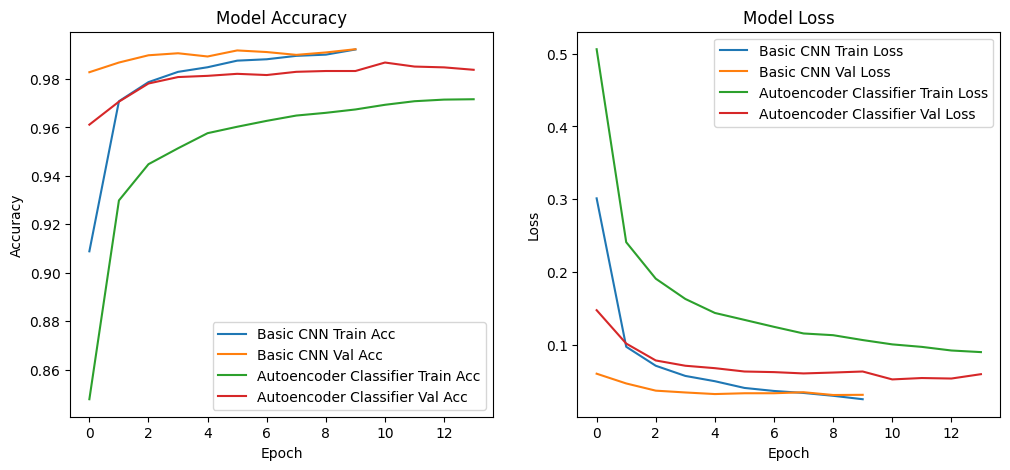

In [36]:
# # Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_basic.history['accuracy'], label='Basic CNN Train Acc')
plt.plot(history_basic.history['val_accuracy'], label='Basic CNN Val Acc')
plt.plot(history_classifier.history['accuracy'], label='Autoencoder Classifier Train Acc')
plt.plot(history_classifier.history['val_accuracy'], label='Autoencoder Classifier Val Acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_basic.history['loss'], label='Basic CNN Train Loss')
plt.plot(history_basic.history['val_loss'], label='Basic CNN Val Loss')
plt.plot(history_classifier.history['loss'], label='Autoencoder Classifier Train Loss')
plt.plot(history_classifier.history['val_loss'], label='Autoencoder Classifier Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()
